# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.063105e+01     7.416181e+00
 * time: 0.0019788742065429688
     1     2.983837e+01     5.329882e+00
 * time: 0.008170843124389648
     2     2.135839e+01     6.130726e+00
 * time: 0.013341903686523438
     3     1.680957e+01     5.499350e+00
 * time: 0.017857074737548828
     4     1.177151e+01     1.818210e+00
 * time: 0.022361040115356445
     5     9.942737e+00     9.122020e-01
 * time: 0.02707505226135254
     6     9.369487e+00     1.566793e+00
 * time: 0.03097701072692871
     7     8.925382e+00     1.120905e+00
 * time: 0.034822940826416016
     8     8.610810e+00     6.462527e-01
 * time: 0.03941702842712402
     9     8.423206e+00     7.954623e-01
 * time: 0.04404807090759277
    10     8.271141e+00     5.805148e-01
 * time: 0.048892974853515625
    11     8.167019e+00     4.406269e-01
 * time: 0.05361199378967285
    12     8.162117e+00     1.213512e+00
 * time: 0.05756497383117676
    13     8.130727e+00     7.103348e-01


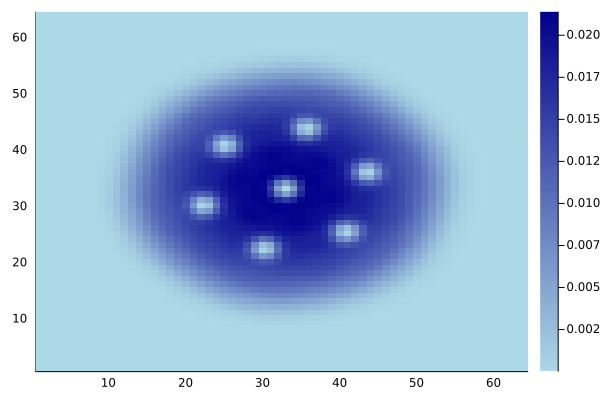

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)